In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import textblob

sns.set()
%matplotlib inline

In [2]:
f = open("_chat.txt")

In [3]:
lines = f.readlines()

In [4]:
lines2 = []
errors = []

In [5]:
for line in lines:
    try:
        #split the lines at ":" points
        tokens = line.split("]")
        senderandmessage = ''.join(tokens[1])
        separate = senderandmessage.split(":")
        t1 = "".join(tokens[0]) # the time + date sent
        dateandtime = t1.split(",")
        t0 = dateandtime[0] #date
        t0 = t0[1:]
        t1 = dateandtime[1] #time
        hourminsec = t1.split(":")
        hour = hourminsec[0]
        t2 = separate[0].strip() #the name of sender
        text = separate[1] #the rest of the sentence
        lines2.append([t0, hour, t2, text]) 
    except:
        errors.append(line)
        continue
print(len(errors))


40


In [6]:
df = pd.DataFrame(np.array(lines2).reshape(-1,4)) #make a dataframe from the list lines2
df.columns = ['date', 'time', 'sender', 'text']
text = df["text"]
df = df.replace('\n','', regex=True)
df = df[np.invert(df['text'].str.contains('image omitted'))]


In [7]:
df = df.replace('Clara','Y', regex=True)
df.head()

,date,time,sender,text
0,07/11/2015,21,Y,"This was a pic I took today, beautiful lighting!"
2,08/11/2015,19,Riccardo Conci,So you sent me the photos on whatsup? ;p
3,08/11/2015,19,Y,Boh sorry
4,08/11/2015,19,Y,I can't remember honestly
5,08/11/2015,19,Y,Sorry I mist have forgotten


In [8]:
df['len'] = df.text.str.len() #add a column with lenght of each message
print(df.len.mean()) #average length of messages

39.415543422624125


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
def getPolarity(text):
    o = textblob.TextBlob(text)
    return o.sentiment[0]

In [11]:
df['polarity'] = df['text'].apply(getPolarity)

In [12]:
for sender in df['sender'].unique():
    print(sender)
    print(df[df['sender']==sender]['polarity'].mean())

Y
0.07308167851794553
Riccardo Conci
0.08292421799143124


In [13]:
df[df['polarity']>0.5]['sender'].value_counts()


Riccardo Conci    392
Y                 391
Name: sender, dtype: int64

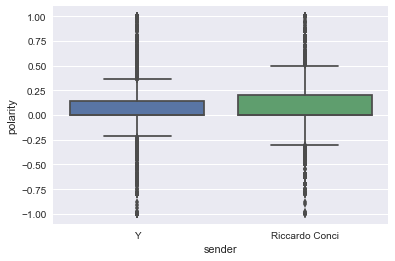

In [14]:
sns.boxplot(data=df, x='sender', y='polarity')

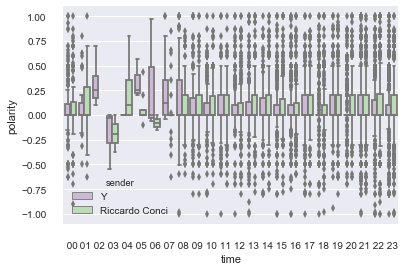

In [15]:
#g = sns.lmplot(x="time", y="polarity", hue="sender", col="sender",fit_reg=False, size=6, data=df)
sns.boxplot(x="time", y="polarity", hue="sender", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)

In [16]:
df = df.set_index('date')

/Users/riccardoconci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  after removing the cwd from sys.path.
/Users/riccardoconci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """
/Users/riccardoconci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  after removing the cwd from sys.path.
/Users/riccardoconci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """


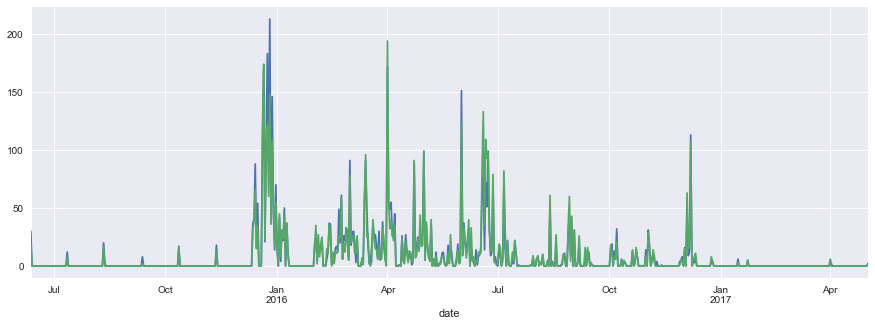

In [17]:
tss = {}
for sender in df['sender'].unique():
    tmp = df[df['sender']==sender]
    tss[sender.strip()] = tmp.resample('D', how='count')['sender']
    tmp.resample('D', how='count')['sender'].plot(figsize=(15,5))

In [18]:
rs = pd.DataFrame(tss)

In [19]:
rs['diff'] = rs['Y'] - rs['Riccardo Conci']

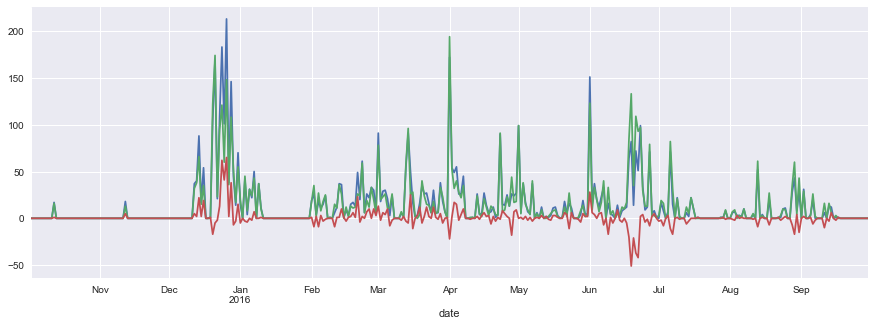

In [20]:
tmp = rs[rs.index>'2015-10-01']
tmp = tmp[tmp.index<'2016-10-01']
tmp['Y'].plot(figsize=(15,5))
tmp['Riccardo Conci'].plot(figsize=(15,5))
tmp['diff'].plot(figsize=(15,5))

In [21]:
def plotText(text):
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")

Riccardo Conci


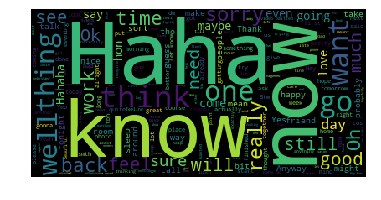

Y


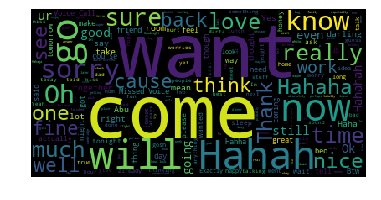

In [22]:
for sender in ['Riccardo Conci', 'Y']:
    text = " ".join(df[df['sender']==sender]['text'].tolist())
    print(sender)
    plotText(text)
    plt.show()